#### 
I am not presenting all my results because part of what i do is also in the strategies i develop

I would really appreciate to have a call to be able to discuss all the results that i have inb this notebook and to explain how i did the research. 

Then i will be able to explain what i can do if i were to have more time to work on this project 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from create_gif_liquidity import *

df = pd.read_csv('ekubo_market_depth_dataset.csv')

df['time'] = pd.to_datetime(df['BLOCK_TIMESTAMP'], format='%Y-%m-%d %H:%M:%S')
df.sort_values('time', inplace=True)
df.set_index('time', inplace=True)

def calculate_price(tick, token0_decimals, token1_decimals):
    return np.where(tick == 0, 0, (1.000001 ** tick) * (token0_decimals - token1_decimals))

df['PRICE']       = calculate_price(df['SWAP_TICK'].values, df['TOKEN0_DECIMALS'].values, df['TOKEN1_DECIMALS'].values)
df['UPPER_PRICE'] = calculate_price(df['UPPER_TICK'].values, df['TOKEN0_DECIMALS'].values, df['TOKEN1_DECIMALS'].values)
df['LOWER_PRICE'] = calculate_price(df['LOWER_TICK'].values, df['TOKEN0_DECIMALS'].values, df['TOKEN1_DECIMALS'].values)

df['RESERVE_TOKEN0_REAL'] = df['TOKEN0_REAL_AMOUNT'].astype('float').cumsum()
df['RESERVE_TOKEN1_REAL'] = df['TOKEN1_REAL_AMOUNT'].astype('float').cumsum()

# Filter rows where EVENT_NAME is 'Swap' and calculate FEE_TOKEN0_REAL and FEE_TOKEN1_REAL
df.loc[df['EVENT_NAME'] == 'Swap', 'FEE_TOKEN0_REAL'] = df[df['EVENT_NAME'] == 'Swap']['TOKEN0_REAL_AMOUNT'].astype('float') * df[df['EVENT_NAME'] == 'Swap']['FEE_TIER']
df.loc[df['EVENT_NAME'] == 'Swap', 'FEE_TOKEN1_REAL'] = df[df['EVENT_NAME'] == 'Swap']['TOKEN1_REAL_AMOUNT'].astype('float') * df[df['EVENT_NAME'] == 'Swap']['FEE_TIER']

# Fill NaN values with 0
df['FEE_TOKEN0_REAL'].fillna(0, inplace=True)
df['FEE_TOKEN1_REAL'].fillna(0, inplace=True)


# calculate fee value in USD
df['FEE_USD'] = df['FEE_TOKEN0_REAL'] + df['FEE_TOKEN1_REAL'] * df['PRICE']
                                                  
df['RATIO'] = df['RESERVE_TOKEN0_REAL'] / df['RESERVE_TOKEN1_REAL']

print(df['TO_ADDRESS'].unique()) # is the core contract address of ekubo contract on starknet 

df

C:\Users\amvmo\AppData\Local\Temp\ipykernel_17336\1478162569.py:6: DtypeWarning:

Columns (8,10,13,17) have mixed types. Specify dtype option on import or set low_memory=False.



['0x00000005dd3d2f4429af886cd1a3b08289dbcea99a294197e9eb43b0e0325b4b']


,BLOCK_NUMBER,BLOCK_TIMESTAMP,TX_HASH,TX_ID,POOL_ID,TOKEN0_ADDRESS,TOKEN1_ADDRESS,EVENT_NAME,FROM_ADDRESS,TO_ADDRESS,...,TICK_SPACING,PRICE,UPPER_PRICE,LOWER_PRICE,RESERVE_TOKEN0_REAL,RESERVE_TOKEN1_REAL,FEE_TOKEN0_REAL,FEE_TOKEN1_REAL,FEE_USD,RATIO
time,,,,,,,,,,,,,,,,,,,,,
2023-08-21 18:06:57,165392,2023-08-21 18:06:57,0x01ea581a453476494eca6b2ea00a1f76db90782dea8a...,5461067_0_165392_85,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee...,Mint,0x03f60afe30844f556ac1c674678ac4447840b1c6c268...,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,...,19802,0.000000e+00,2.285008e-08,1.801727e-08,-7.742768e-02,-1.000000e+02,0.000000e+00,0.000000,0.000000e+00,0.000774
2023-08-24 15:58:31,170064,2023-08-24 15:58:31,0x069bc31e0f800cc1f8a230d7e9aefdb3dd951b25ffc0...,5461067_0_170064_159,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee...,Burn,0x03f60afe30844f556ac1c674678ac4447840b1c6c268...,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,...,19802,0.000000e+00,2.285008e-08,1.801727e-08,-6.592967e-02,-8.515000e+01,0.000000e+00,0.000000,0.000000e+00,0.000774
2023-08-25 17:26:00,171593,2023-08-25 17:26:00,0x07a988769782b294fee1fb284dc6cf91a489d4fadf0e...,5461067_0_171593_125,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee...,0x068f5c6a61780768455de69077e07e89787839bf8166...,Mint,0x05bd8ab4d952836ca627116bad96ab584480c15e94f9...,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,...,200,0.000000e+00,0.000000e+00,0.000000e+00,-9.400659e+02,-1.025150e+03,0.000000e+00,0.000000,0.000000e+00,0.917003
2023-08-25 17:50:20,171601,2023-08-25 17:50:20,0x053ef4a64141cae34f1aafb6e2122bf6f84d375e26d1...,5461067_0_171601_34,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee...,Mint,0x01abcf557276cd3e3e717c2d385685c49397f7da5e8b...,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,...,5982,0.000000e+00,1.916586e-08,1.680248e-08,-9.400659e+02,-1.125150e+03,0.000000e+00,0.000000,0.000000e+00,0.835503
2023-08-25 18:08:47,171607,2023-08-25 18:08:47,0x05e56c0fa062d8e1f981b2e0ceb4eb574317ce03fe87...,5461067_0_171607_182,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee...,0x068f5c6a61780768455de69077e07e89787839bf8166...,Mint,0x06826f64179d7410b76516bdcf66fc6bd9c6b1c3c932...,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,...,5982,0.000000e+00,0.000000e+00,0.000000e+00,-1.040066e+03,-1.228005e+03,0.000000e+00,0.000000,0.000000e+00,0.846955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-25 03:57:26,582428,2024-02-25 03:57:26,0x01debcfcf3339ec5c5163e7f320bd0fc70617c61de80...,5461067_0_582428_32,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee...,0x068f5c6a61780768455de69077e07e89787839bf8166...,Burn,0x0261e13db5c0be8696ef192e9b0ea3ab81bdf09ef0e3...,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,...,25,0.000000e+00,0.000000e+00,0.000000e+00,-2.893524e+06,-4.602205e+07,0.000000e+00,0.000000,0.000000e+00,0.062873
2024-02-25 03:57:26,582428,2024-02-25 03:57:26,0x0286d056b451658c07b718e30fc119da671f2d0df242...,5461067_0_582428_60,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x04718f5a0fc34cc1af16a1cdee98ffb20c31f5cd61d6...,0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee...,Swap,0x03266fe47923e1500aec0fa973df8093b5850bbce8dc...,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,...,200,2.285910e-11,0.000000e+00,0.000000e+00,-2.893531e+06,-4.602204e+07,-7.000000e-04,0.001333,-7.000000e-04,0.062873
2024-02-25 03:57:26,582428,2024-02-25 03:57:26,0x03ba9456697309a756c547c8fc436984c820466cb109...,5461067_0_582428_33,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x04718f5a0fc34cc1af16

In [ ]:
df['FEE_TOKEN0_REAL']

In [39]:
pool_id = df['POOL_ID'].values[0]
# first is addres of the mainnet core contract
# second is the address of the token 0
# third  is the address of the token 1
token0_address = pool_id.split('-')[1]
token1_address = pool_id.split('-')[2]
core_contract_address = pool_id.split('-')[0]
print('Token 0 address:', token0_address)
print('Token 1 address:', token1_address)

# select only one pool 
pool_data = df[df['POOL_ID'] == pool_id].copy()

# LIQUIDITY_AMOUNT is the amount added or removed after a mint or a burn event
# LIQUIDITY is the total liquidity in the pool
pool_data['LIQUIDITY'] = pool_data['LIQUIDITY_AMOUNT'].astype('float').cumsum()

# select only one trader 
trader_id =  '0x078ba266d0326ba2f4ecfb7d14a0af9ecd436809a04fae8e5774e0b49774da77' # pool_data['FROM_ADDRESS'].values[6]
trader_tx_pool = pool_data[pool_data['FROM_ADDRESS'] == trader_id].copy()

# pool_data = pool_data[pool_data['EVENT_NAME'] == 'Swap']

f2 = ['EVENT_NAME', 'TOKEN0_REAL_AMOUNT', 'TOKEN1_REAL_AMOUNT', 'FEE_TIER', 'LIQUIDITY', 'PRICE', 'UPPER_PRICE', 'LOWER_PRICE', 'LOWER_TICK', 'UPPER_TICK', 'SWAP_TICK']
trader_tx_pool[f2]

Token 0 address: 0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c741b1562b82f9e004dc7
Token 1 address: 0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee7e0d5ebb06f3ecf368a8


,EVENT_NAME,TOKEN0_REAL_AMOUNT,TOKEN1_REAL_AMOUNT,FEE_TIER,LIQUIDITY,PRICE,UPPER_PRICE,LOWER_PRICE,LOWER_TICK,UPPER_TICK,SWAP_TICK
time,,,,,,,,,,,
2023-12-31 12:20:38,Mint,-0.022932,-150.316781,0.01,1.072712e+16,0.0,2.785394e-08,2.677237e-08,-19920812,-19881208,0
2024-01-02 08:39:49,Burn,0.000000,201.240324,0.01,1.127387e+16,0.0,2.785394e-08,2.677237e-08,-19920812,-19881208,0
2024-01-02 08:44:34,Mint,-0.035512,-200.000000,0.01,1.208934e+16,0.0,2.897920e-08,2.841100e-08,-19861406,-19841604,0
2024-01-03 14:29:39,Burn,0.118207,0.000000,0.01,1.214829e+16,0.0,2.897920e-08,2.841100e-08,-19861406,-19841604,0
2024-01-03 14:46:51,Mint,-0.034422,-191.332274,0.01,1.323832e+16,0.0,2.677237e-08,2.624744e-08,-19940614,-19920812,0
2024-01-04 15:57:32,Burn,0.000000,265.234448,0.01,1.282675e+16,0.0,2.677237e-08,2.624744e-08,-19940614,-19920812,0
2024-01-04 16:04:42,Mint,-0.040645,-150.007997,0.01,1.350926e+16,0.0,2.730780e-08,2.677237e-08,-19920812,-19901010,0
2024-01-08 01:01:58,Burn,0.106396,0.000000,0.01,1.444891e+16,0.0,2.730780e-08,2.677237e-08,-19920812,-19901010,0
2024-01-08 02:51:41,Mint,-0.035233,-160.416567,0.01,1.581660e+16,0.0,2.677237e-08,2.624744e-08,-19940614,-19920812,0


In [40]:
import pandas as pd

def market_depth(pool_data, depth):
    """
    Calculate market depth based on token amounts within a specified depth range

    Params:
    - pool_data: DataFrame containing the pool data.
    - depth: The depth percentage (e.g., 0.01 for 1%).

    Returns:
    - The total USD value of tokens within the depth range.
    """
    tick_spacing = pool_data['TICK_SPACING'].iloc[0]  # Assume a uniform tick spacing for simplicity
    current_price = pool_data['PRICE'].iloc[-1]
    lower_bound_price = current_price / (1 + depth)
    upper_bound_price = current_price * (1 + depth)
    print('lower_bound_price:', lower_bound_price)
    print('upper_bound_price:', upper_bound_price)
    
    # Initialize the total USD value
    total_usd_value = 0

    for _, row in pool_data.iterrows():
        lower_tick = row['LOWER_TICK']
        upper_tick = row['UPPER_TICK']

        # Check if the position's range overlaps with the depth range
        if not (lower_bound_price > upper_tick or upper_bound_price < lower_tick):
            # Calculate the number of ticks covered by this position
            num_ticks = (upper_tick - lower_tick) // tick_spacing + 1

            # Distribute token amounts equally across all ticks
            token0_per_tick = float(row['TOKEN0_REAL_AMOUNT']) / num_ticks
            token1_per_tick = float(row['TOKEN1_REAL_AMOUNT']) / num_ticks

            # the USD value of token0 is direct and token1 needs to be multiplied by the current price
            # Adjust based on your token valuation model
            if row['EVENT_NAME'] != 'Burn':
                total_usd_value -= (token0_per_tick + token1_per_tick * current_price) * num_ticks
            if row['EVENT_NAME'] != 'Mint':
                total_usd_value += (token0_per_tick + token1_per_tick * current_price) * num_ticks

    return total_usd_value


In [10]:
depth_value_10 = market_depth(df, 0.1)
depth_value_5 = market_depth(df, 0.05)
depth_value_2 = market_depth(df, 0.02)
print(f"Market for a depth of 2  % : {round(depth_value_2)}")
print(f"Market for a depth of 5  % : {round(depth_value_5)}")
print(f"Market for a depth of 10 % : {round(depth_value_10)}")

lower_bound_price: 3.2987447717506366e-08
upper_bound_price: 3.991481173818271e-08
lower_bound_price: 3.4558278561197146e-08
upper_bound_price: 3.8100502113719856e-08
lower_bound_price: 3.5574698518879416e-08
upper_bound_price: 3.701191633904214e-08
Market for a depth of 2  % : 0
Market for a depth of 5  % : 0
Market for a depth of 10 % : 0


In [41]:
df[['EVENT_NAME','SWAP_TICK', 'UPPER_TICK', 'LOWER_TICK', 'PRICE', 'UPPER_PRICE', 'LOWER_PRICE']]

,EVENT_NAME,SWAP_TICK,UPPER_TICK,LOWER_TICK,PRICE,UPPER_PRICE,LOWER_PRICE
time,,,,,,,
2023-08-21 18:06:57,Mint,0,-20079228,-20316852,0.000000e+00,2.285008e-08,1.801727e-08
2023-08-24 15:58:31,Burn,0,-20079228,-20316852,0.000000e+00,2.285008e-08,1.801727e-08
2023-08-25 17:26:00,Mint,0,4000,-4000,0.000000e+00,0.000000e+00,0.000000e+00
2023-08-25 17:50:20,Mint,0,-20255052,-20386656,0.000000e+00,1.916586e-08,1.680248e-08
2023-08-25 18:08:47,Mint,0,113658,-125622,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
2024-02-25 03:57:26,Burn,0,150,-650,0.000000e+00,0.000000e+00,0.000000e+00
2024-02-25 03:57:26,Swap,-26986592,0,0,2.285910e-11,0.000000e+00,0.000000e+00
2024-02-25 03:57:26,Mint,0,-7274112,-7465536,0.000000e+00,0.000000e+00,0.000000e+00


In [42]:
# used to identify different traders
df.FROM_ADDRESS

time
2023-08-21 18:06:57    0x03f60afe30844f556ac1c674678ac4447840b1c6c268...
2023-08-24 15:58:31    0x03f60afe30844f556ac1c674678ac4447840b1c6c268...
2023-08-25 17:26:00    0x05bd8ab4d952836ca627116bad96ab584480c15e94f9...
2023-08-25 17:50:20    0x01abcf557276cd3e3e717c2d385685c49397f7da5e8b...
2023-08-25 18:08:47    0x06826f64179d7410b76516bdcf66fc6bd9c6b1c3c932...
                                             ...                        
2024-02-25 03:57:26    0x0261e13db5c0be8696ef192e9b0ea3ab81bdf09ef0e3...
2024-02-25 03:57:26    0x03266fe47923e1500aec0fa973df8093b5850bbce8dc...
2024-02-25 03:57:26    0x01db41cd3754a204ea0f2b8c8bcc86c76bbfac55482a...
2024-02-25 03:57:43    0x03266fe47923e1500aec0fa973df8093b5850bbce8dc...
2024-02-25 03:57:43    0x03266fe47923e1500aec0fa973df8093b5850bbce8dc...
Name: FROM_ADDRESS, Length: 3024741, dtype: object

In [43]:
pool_data[f2 + ['LOWER_TICK', 'UPPER_TICK', 'SWAP_TICK']] # .to_csv('pool_data.csv')

,EVENT_NAME,TOKEN0_REAL_AMOUNT,TOKEN1_REAL_AMOUNT,FEE_TIER,LIQUIDITY,PRICE,UPPER_PRICE,LOWER_PRICE,LOWER_TICK,UPPER_TICK,SWAP_TICK,LOWER_TICK,UPPER_TICK,SWAP_TICK
time,,,,,,,,,,,,,,
2023-08-21 18:06:57,Mint,-0.077428,-100.000000,0.01,4.865838e+13,0.000000e+00,2.285008e-08,1.801727e-08,-20316852,-20079228,0,-20316852,-20079228,0
2023-08-24 15:58:31,Burn,0.011498,14.849999,0.01,4.135963e+13,0.000000e+00,2.285008e-08,1.801727e-08,-20316852,-20079228,0,-20316852,-20079228,0
2023-09-04 11:15:51,Mint,-0.060000,-101.899602,0.01,5.512441e+13,0.000000e+00,2.955877e-08,1.338722e-08,-20613882,-19821802,0,-20613882,-19821802,0
2023-09-05 05:17:40,Mint,-0.001992,-3.382250,0.01,5.558129e+13,0.000000e+00,2.955877e-08,1.338722e-08,-20613882,-19821802,0,-20613882,-19821802,0
2023-09-06 20:01:25,Swap,-0.003302,5.429591,0.01,5.558129e+13,1.988361e-08,0.000000e+00,0.000000e+00,0,0,-20218287,0,0,-20218287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-25 02:29:19,Swap,0.363226,-1099.114851,0.01,1.422991e+16,3.606613e-08,0.000000e+00,0.000000e+00,0,0,-19622828,0,0,-19622828
2024-02-25 02:29:19,Swap,0.363226,-1099.114851,0.01,1.422991e+16,3.606613e-08,0.000000e+00,0.000000e+00,0,0,-19622828,0,0,-19622828
2024-02-25 03:07:33,Burn,0.028050,278.388811,0.01,1.420655e+16,0.000000e+00,4.138896e-08,2.196281e-08,-20118832,-19485168,0,-20118832,-19485168,0


In [66]:
import matplotlib.pyplot as plt

def plot_cumulative_pnl_and_liquidity(pool_data, trader_id):
    # Initialize trader's liquidity and PNL
    trader_liquidity = 0
    pnl_values = []
    liquidity_percentages = []

    # Iterate through each row in the pool_data
    for index, row in pool_data.iterrows():
        # Update trader's liquidity based on Mint and Burn events
        if row['FROM_ADDRESS'] == trader_id:
            if row['EVENT_NAME'] == 'Mint':
                trader_liquidity += float(row['LIQUIDITY_AMOUNT'])
            elif row['EVENT_NAME'] == 'Burn':
                trader_liquidity -= float(row['LIQUIDITY_AMOUNT'])
        
        # Calculate total liquidity in the pool
        total_liquidity = pool_data['LIQUIDITY'].iloc[-1]

        # Calculate trader's liquidity percentage
        if total_liquidity != 0:
            trader_liquidity_percent = trader_liquidity / total_liquidity * 100
        else:
            trader_liquidity_percent = 0

        # Append trader's liquidity percentage to liquidity_percentages list
        liquidity_percentages.append(trader_liquidity_percent)

        # Calculate PNL and append to pnl_values list
        pnl = row['FEE_USD'] * trader_liquidity_percent * 10 ** 11 / 100
        pnl_values.append(pnl)

    # Add PNL and liquidity percentage columns to pool_data
    pool_data['PNL'] = pnl_values
    pool_data['Liquidity_Percentage'] = liquidity_percentages

    # Calculate cumulative PNL
    pool_data['Cumulative_PNL'] = pool_data['PNL'].cumsum()

    # Plot Cumulative PNL and Liquidity Percentage
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot Cumulative PNL
    ax1.plot(pool_data.index, pool_data['Cumulative_PNL'], color='blue')
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Cumulative PNL (USD)', color='blue')

    # Plot Liquidity Percentage
    ax2.plot(pool_data.index, pool_data['Liquidity_Percentage'], color='red')
    ax2.set_xlabel('Timestamp')
    ax2.set_ylabel('Liquidity Percentage (%)', color='red')

    fig.suptitle('Cumulative Profit and Loss (PNL) and Trader\'s Liquidity Percentage in Pool', fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    
    # Save the plot as an image
    plt.savefig('cumulative_pnl_and_liquidity_plot.png')
    plt.close()  # Close the plot to release memory



Trader 0x03fe78b71fb9061269b2595dbcee1caf332ca1b4dc51be148f5ccc370d259e6c has 14 events
Trader 0x07f116fda10778fa1cf6bf39251d3cf792bd243352e76f0dceb6226ebbf7b34d has 14 events
Trader 0x07aab4626a183d729eb47f8dff06bfde32f47bc167e19b24e2be8adc1df0bf48 has 38 events
Trader 0x078ba266d0326ba2f4ecfb7d14a0af9ecd436809a04fae8e5774e0b49774da77 has 37 events
Trader 0x028ab3772149879817f67bb76451011c20bc423b2dab70fe855bebef93fbec87 has 18 events
Trader 0x018fab61d74aafbbd1315616839ab490e1c6ca28d2c21bc700cc72c9933e8232 has 16 events
Trader 0x039ac7a831977f586a7d271d6029c6e4de7d194d7635232d66cfb96f1aab07da has 12 events
Trader 0x0757a70eb6eacc4d52eac9ee71d840453163332fa7094b2ad70f593702ba2047 has 37 events
Trader 0x01bb1d42f33c20fc30aa152f2aedfbf8b553fc500e5998f32de3cbec79561271 has 37 events


C:\Users\amvmo\AppData\Local\Temp\ipykernel_17336\2466806985.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\amvmo\AppData\Local\Temp\ipykernel_17336\2466806985.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\amvmo\AppData\Local\Temp\ipykernel_17336\2466806985.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

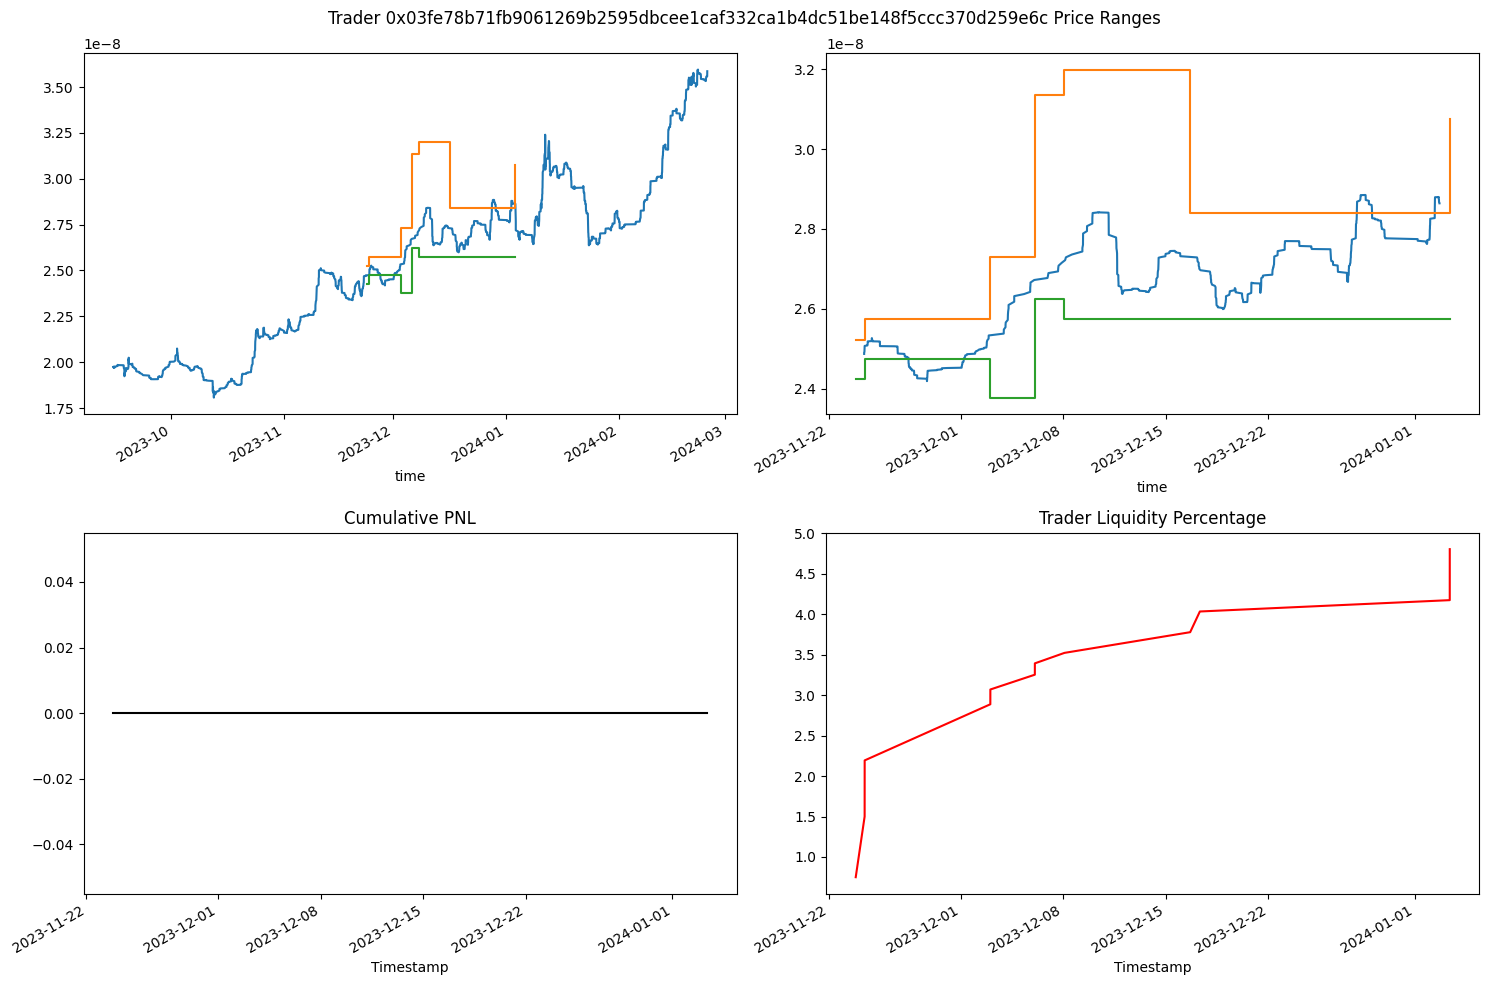

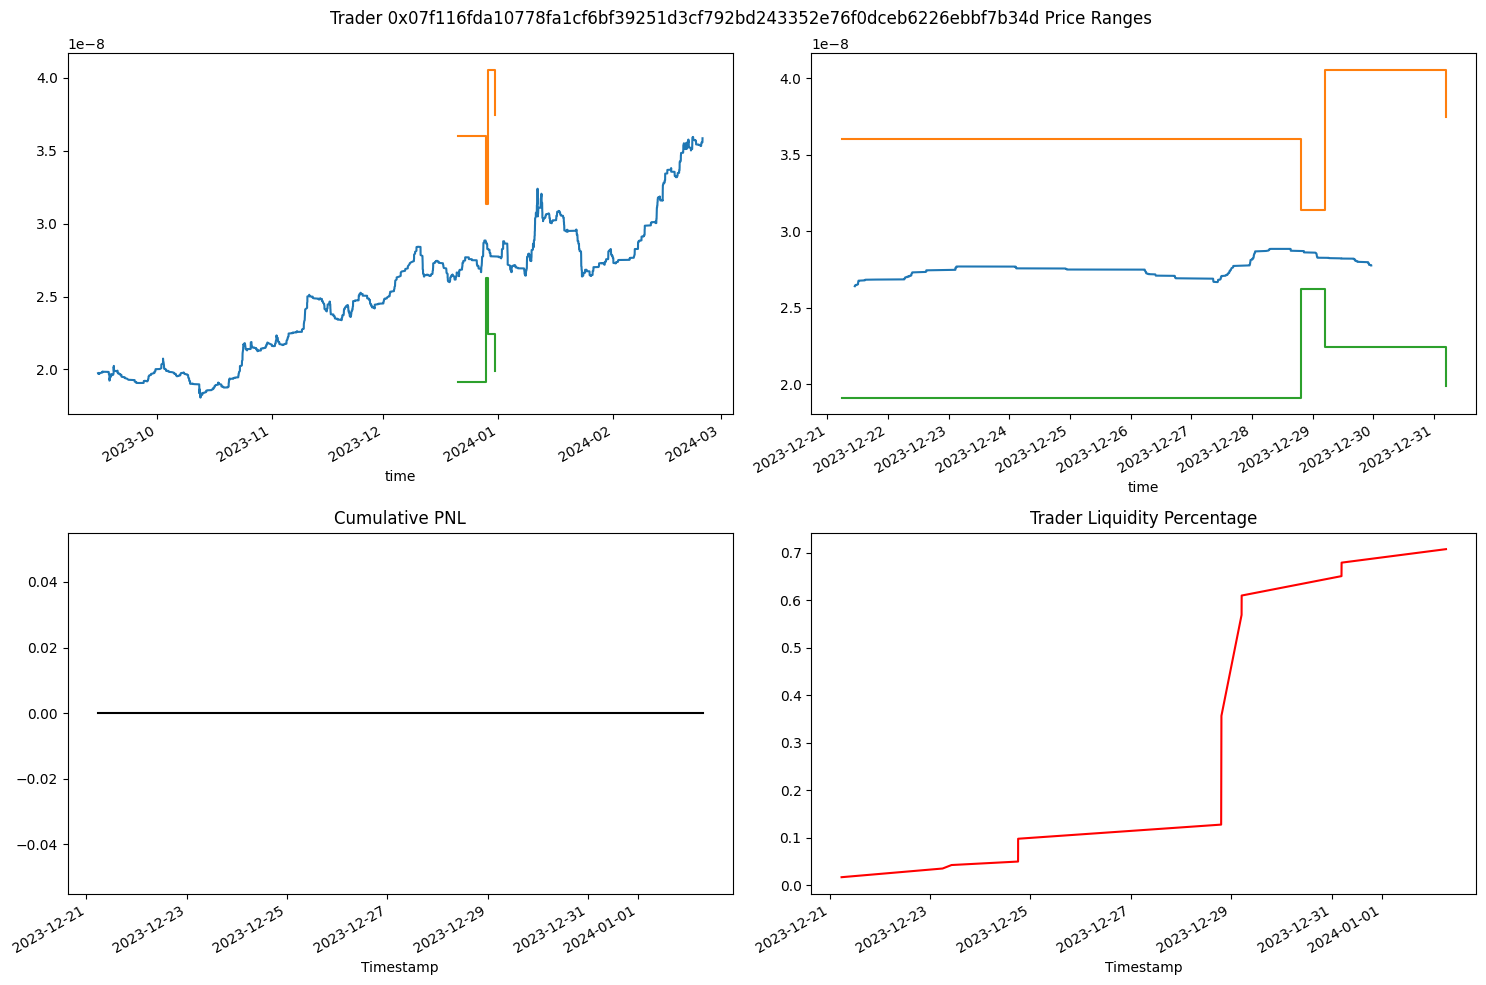

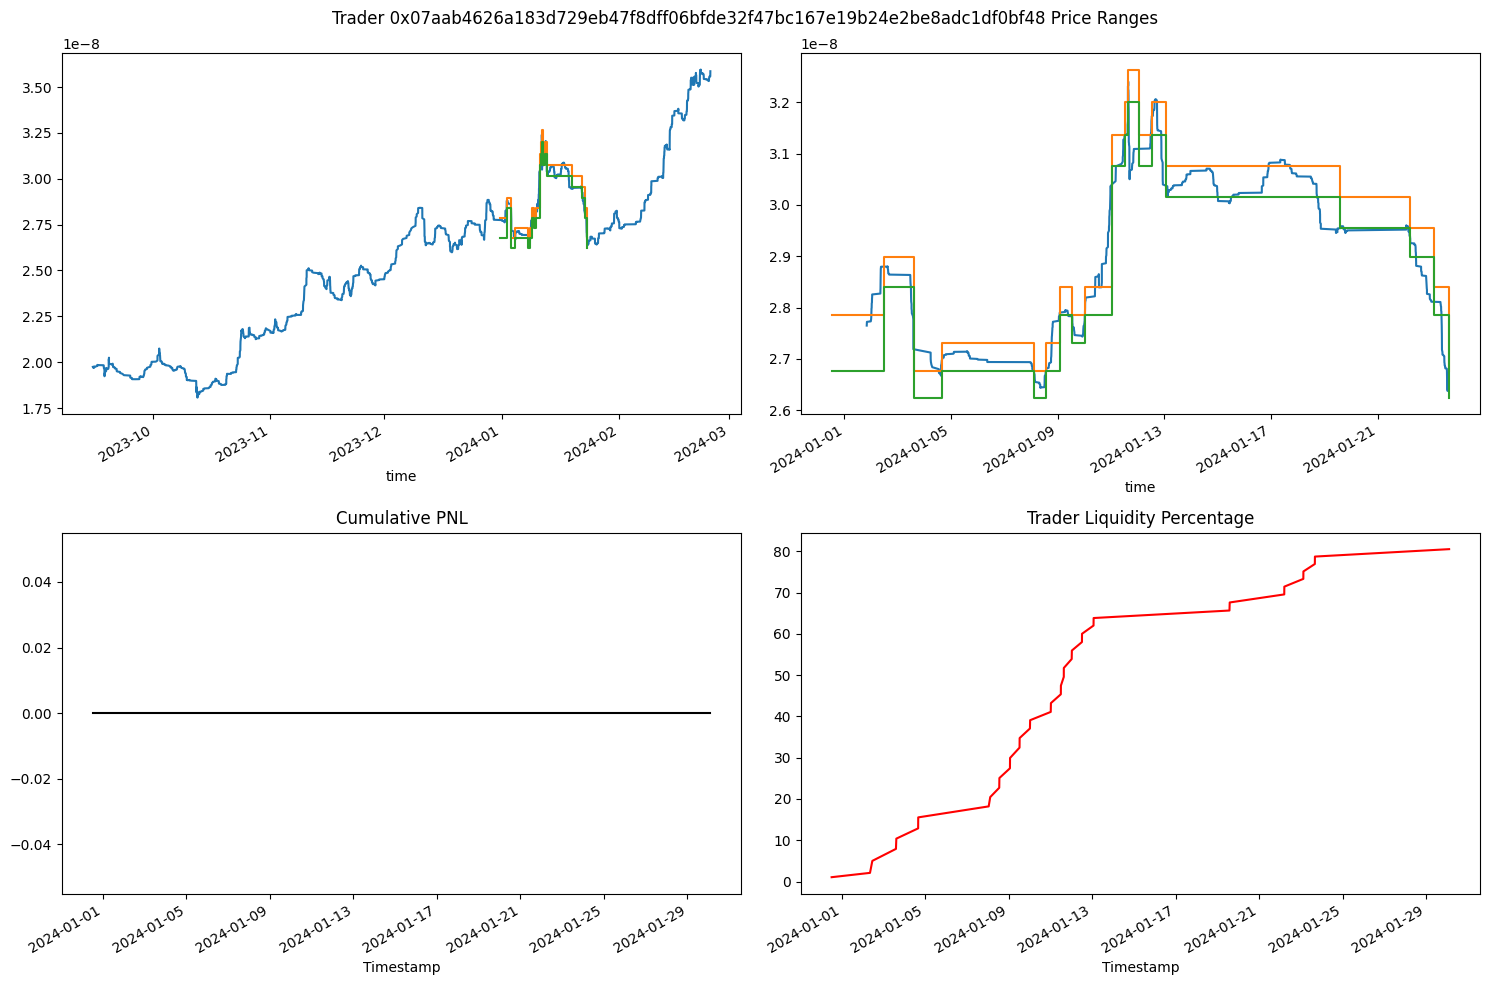

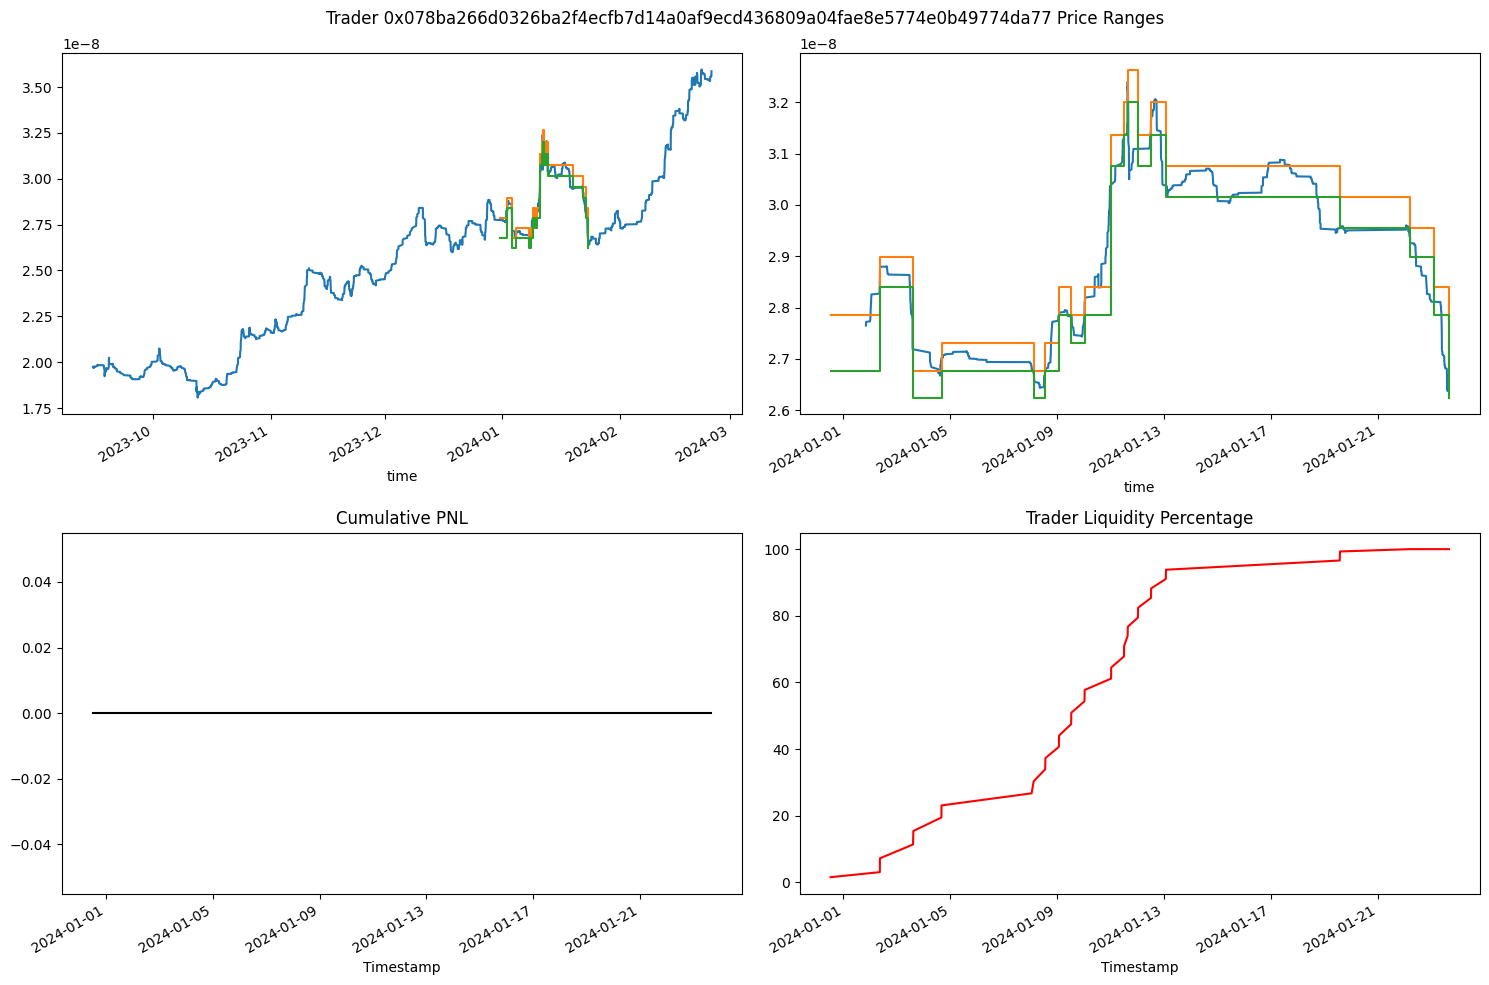

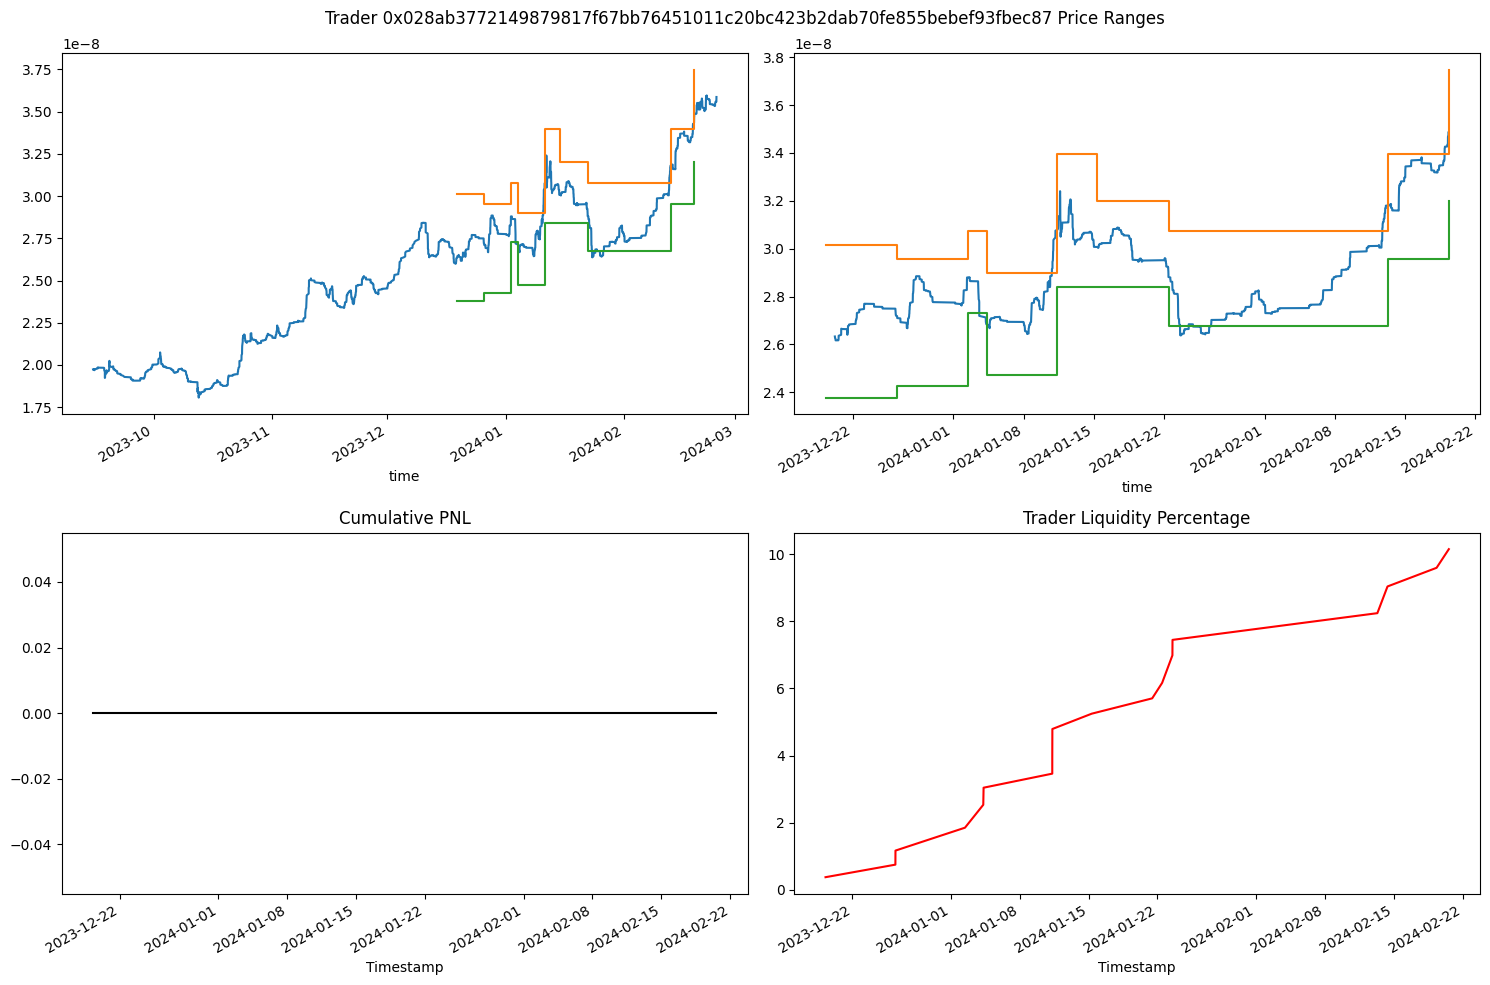

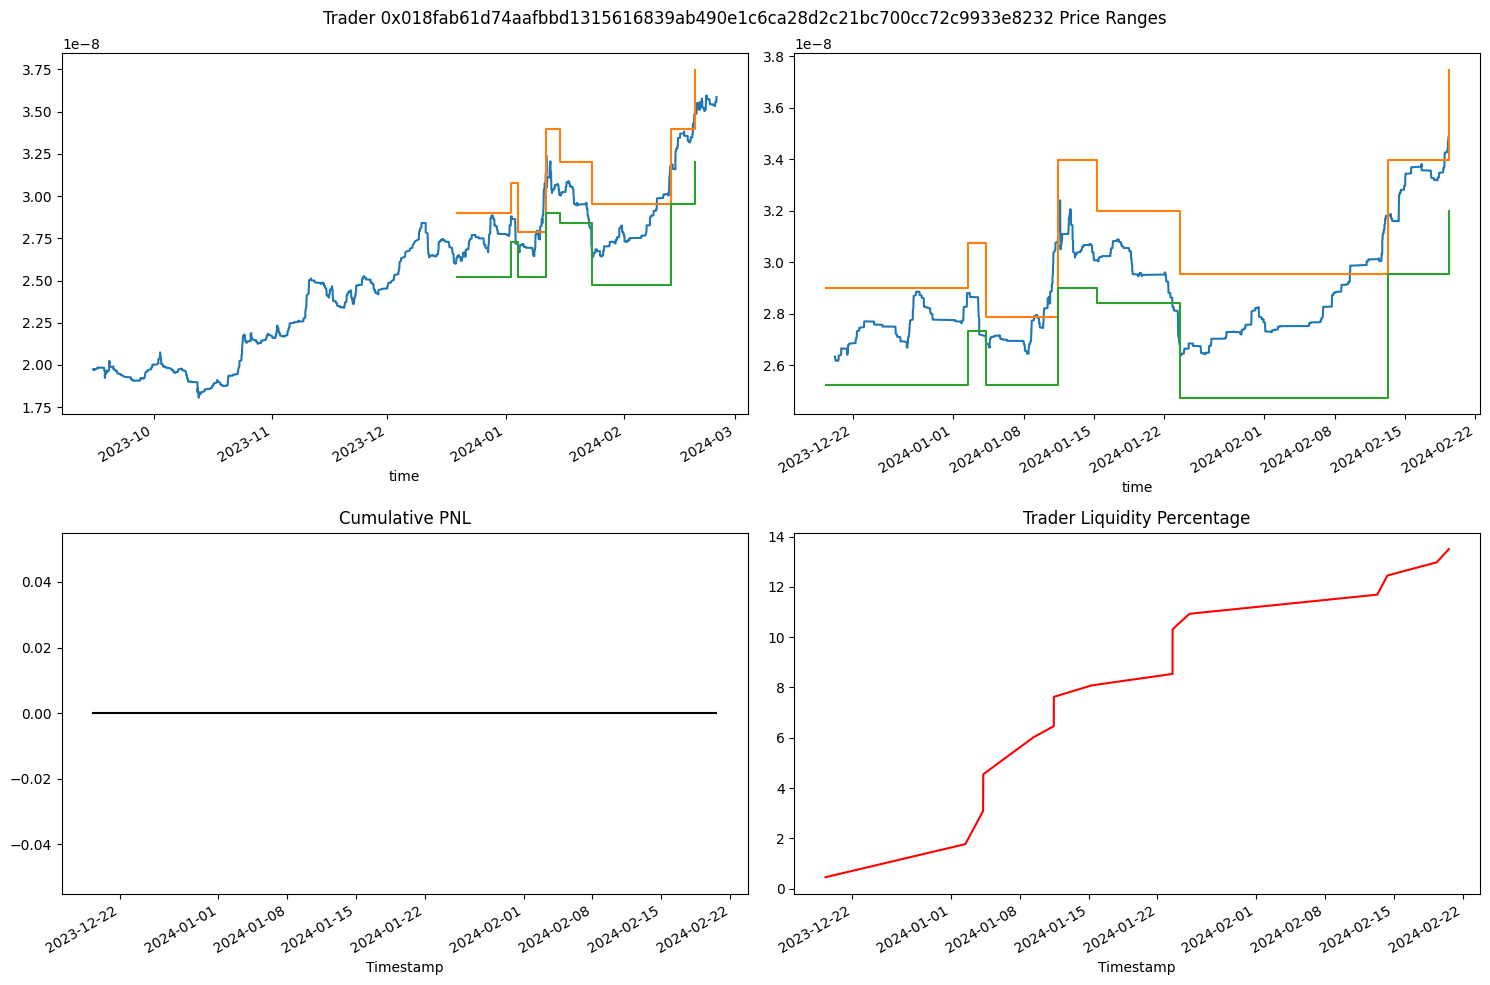

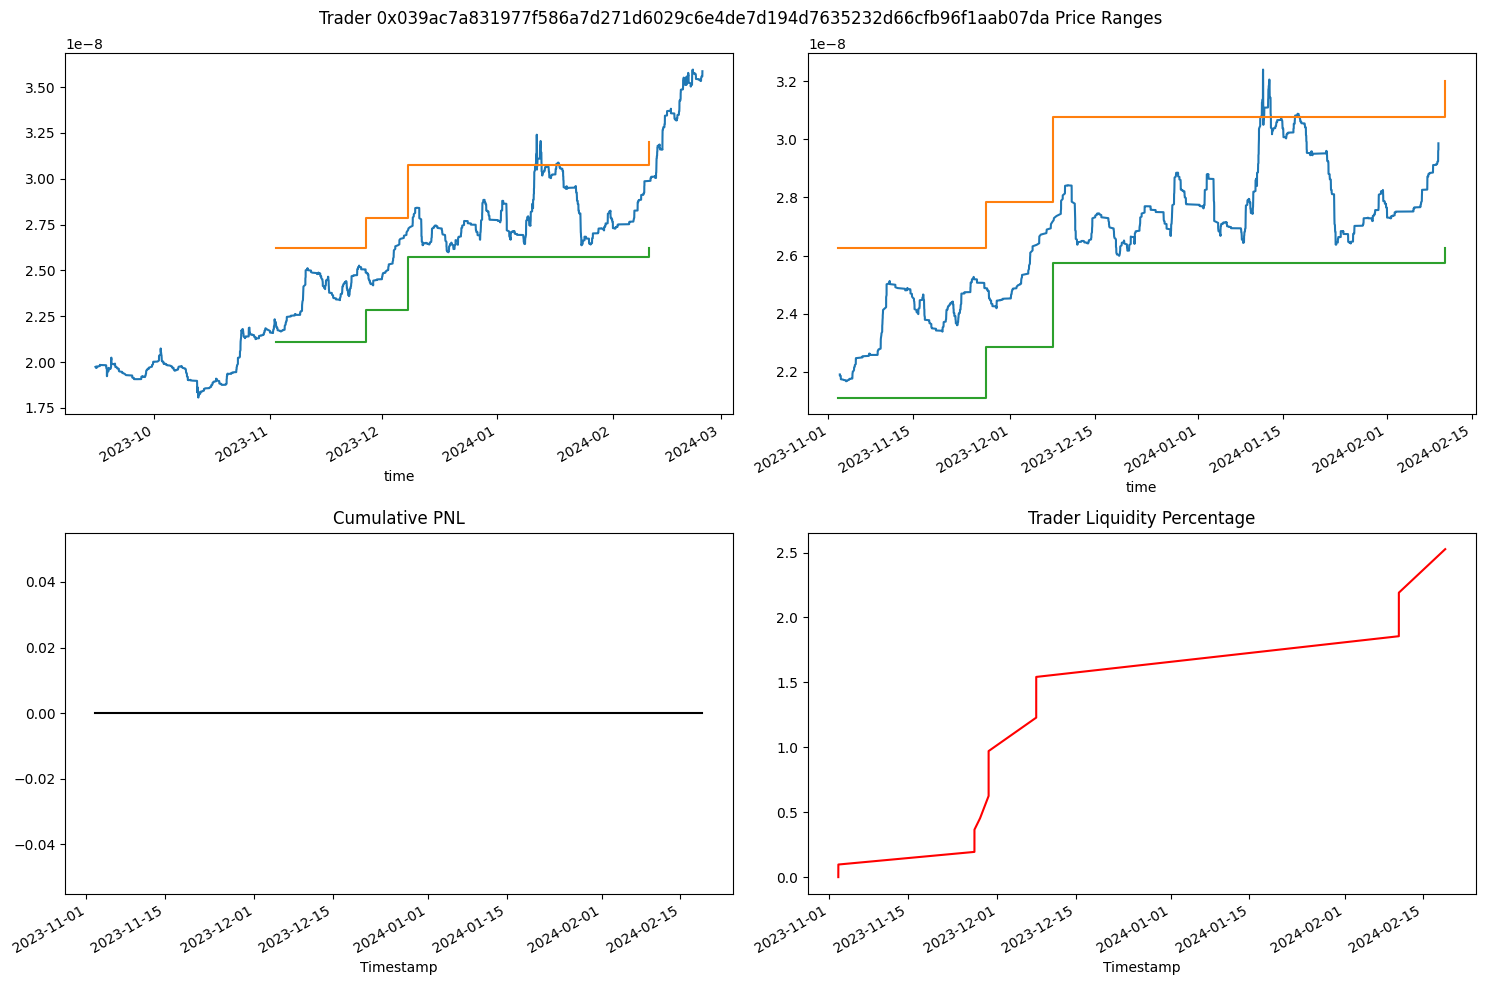

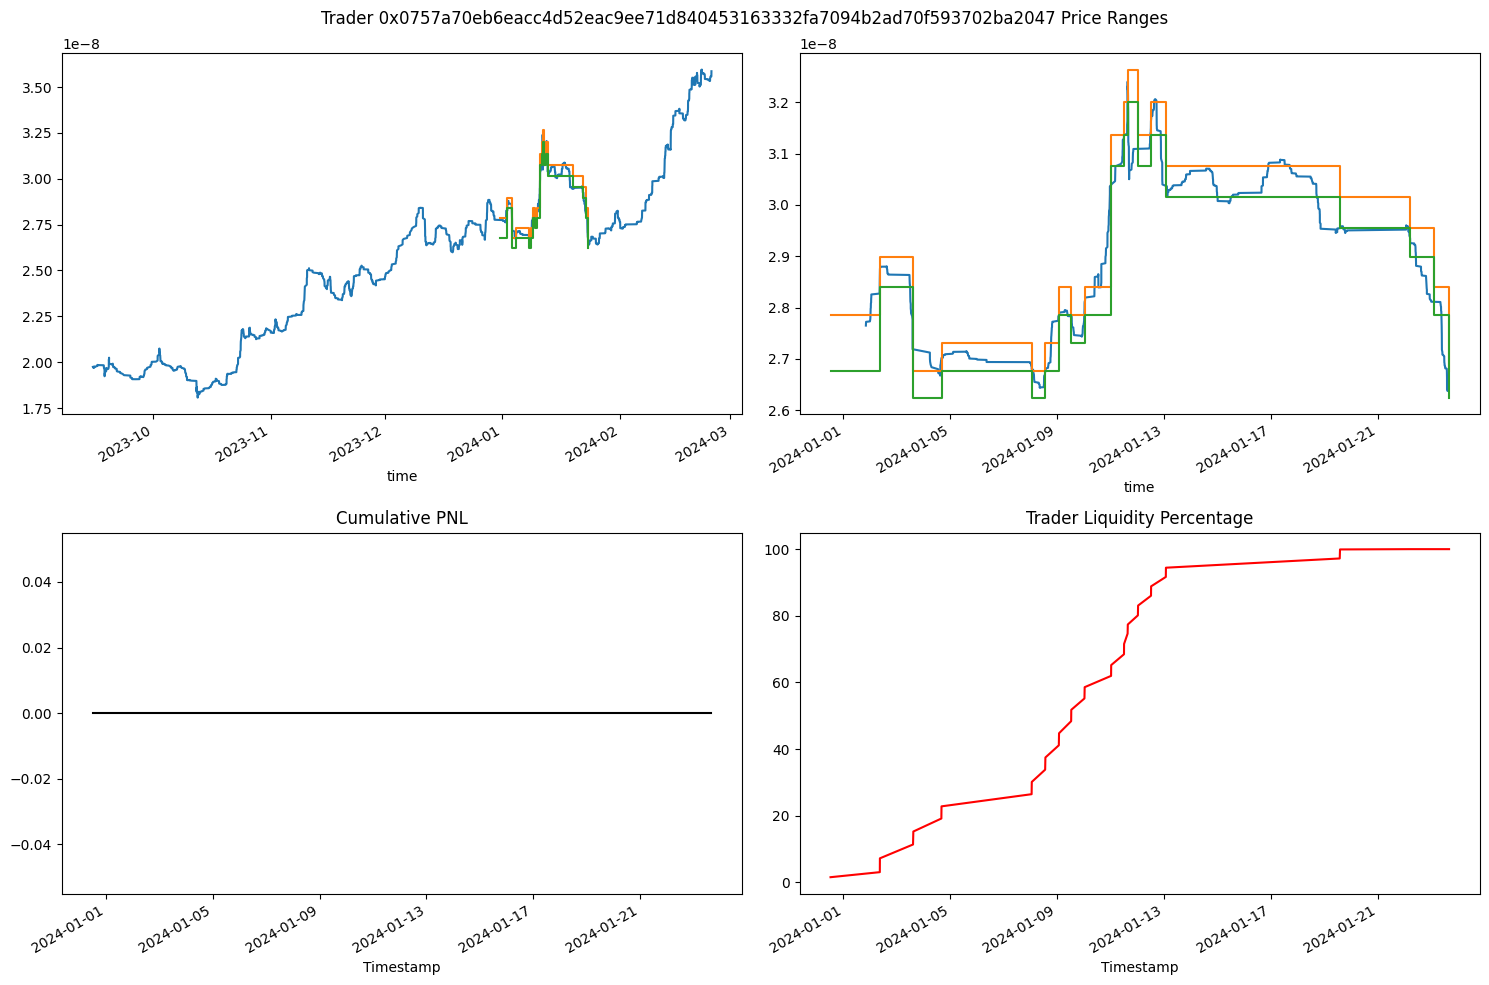

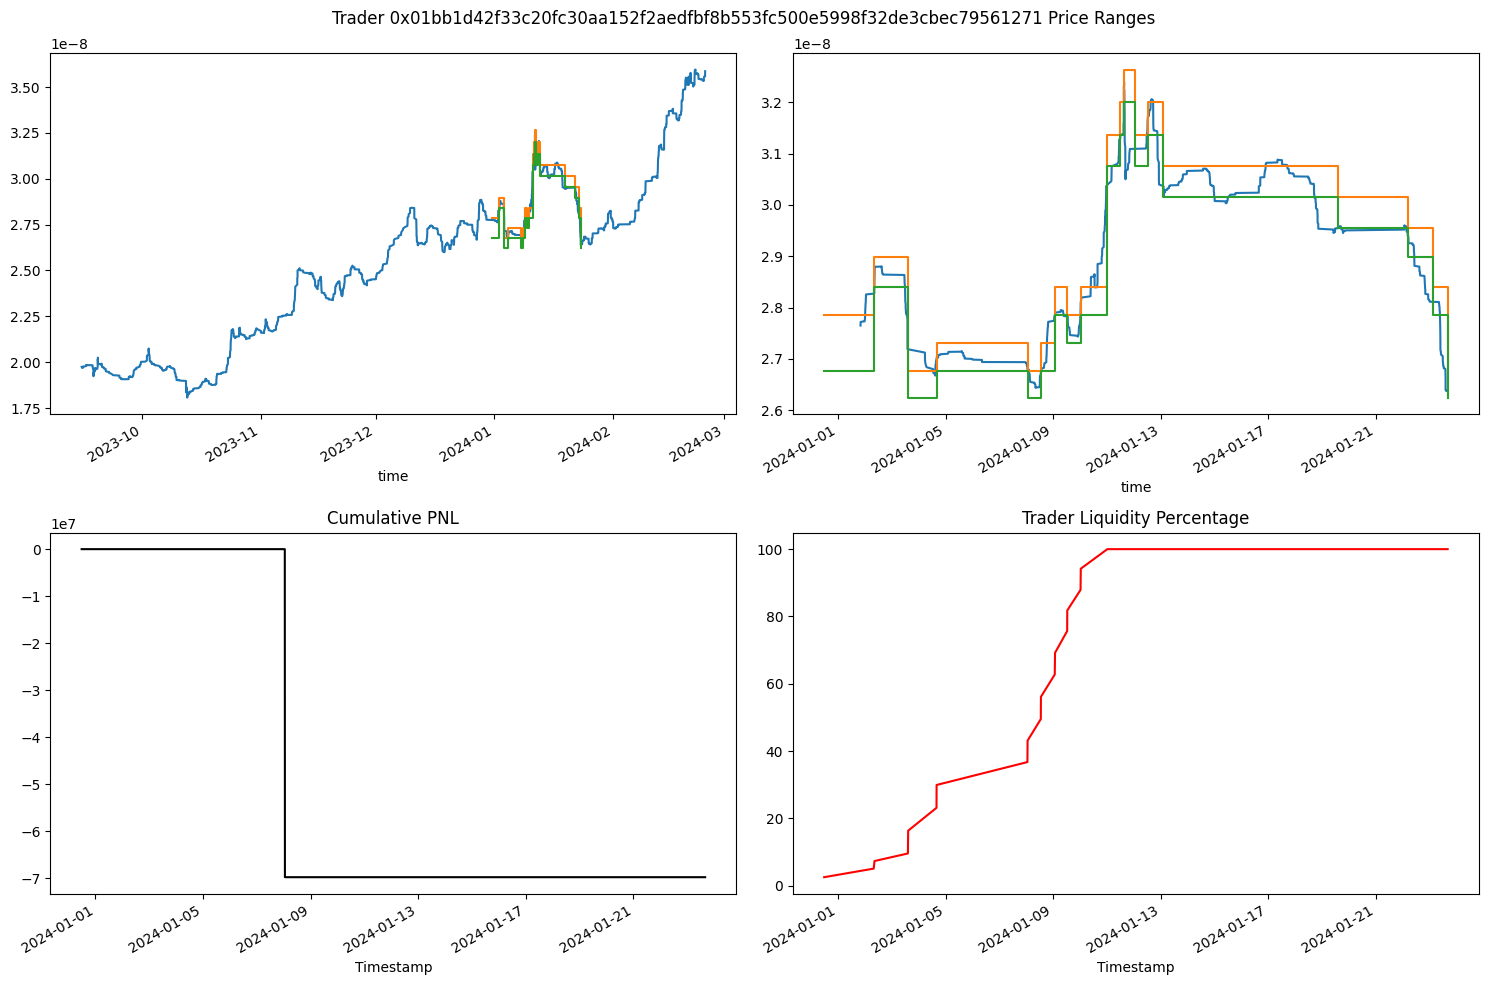

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Select one pool
pool_id = df['POOL_ID'].values[0]
pool_data = df[df['POOL_ID'] == pool_id].copy()
pool_data['LIQUIDITY'] = pool_data['LIQUIDITY_AMOUNT'].astype('float').cumsum()

# Find traders with enough events (at least 12 mint or burn events)
traders_with_enough_events = []
for trader_id in set(pool_data['FROM_ADDRESS'].values):
    num_events = len(pool_data[(pool_data['FROM_ADDRESS'] == trader_id) & (pool_data['EVENT_NAME'].isin(['Mint', 'Burn']))])
    if num_events >= 12:
        print(f'Trader {trader_id} has {num_events} events')
        traders_with_enough_events.append(trader_id)

# Plot price ranges for traders with enough events
for trader_id in traders_with_enough_events:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # Filter data for the current trader
    trader_data = pool_data[pool_data['FROM_ADDRESS'] == trader_id]

    # Plot on the full range
    pool_data[pool_data['EVENT_NAME'] == 'Swap'].PRICE.rolling(20).mean().plot(ax=ax1)
    upper_price = trader_data[trader_data['EVENT_NAME'] == 'Mint'].UPPER_PRICE
    lower_price = trader_data[trader_data['EVENT_NAME'] == 'Mint'].LOWER_PRICE
    ax1.step(upper_price.index, upper_price, where='post')
    ax1.step(lower_price.index, lower_price, where='post')

    # Plot on the limited range
    min_time = min(upper_price.index.min(), lower_price.index.min())
    max_time = max(upper_price.index.max(), lower_price.index.max())
    limited_data = pool_data[(pool_data.index >= min_time) & (pool_data.index <= max_time) & (pool_data['EVENT_NAME'] == 'Swap')]
    limited_data.PRICE.rolling(20).mean().plot(ax=ax2)
    ax2.step(upper_price.index, upper_price, where='post')
    ax2.step(lower_price.index, lower_price, where='post')

    # Calculate trader's liquidity percentage
    trader_liquidity = 0
    trader_liquidity_percentages = []
    for index, row in trader_data.iterrows():
        print(float(row['LIQUIDITY_AMOUNT']))
        if row['EVENT_NAME'] == 'Mint':
            trader_liquidity += float(row['LIQUIDITY_AMOUNT'])
        elif row['EVENT_NAME'] == 'Burn':
            trader_liquidity -= float(row['LIQUIDITY_AMOUNT'])
        total_liquidity = pool_data['LIQUIDITY'].iloc[-1]
        if total_liquidity != 0:
            trader_liquidity_percent = min(trader_liquidity / total_liquidity * 100, 100)
        else:
            trader_liquidity_percent = 0
        trader_liquidity_percentages.append(trader_liquidity_percent)
    trader_data['Trader_Liquidity_Percentage'] = trader_liquidity_percentages

    # Plot cumulative PNL
    pnl_values = []
    cumulative_pnl = 0
    for index, row in trader_data.iterrows():
        pnl = row['FEE_USD'] * row['Trader_Liquidity_Percentage'] * 10 ** 11 / 100
        cumulative_pnl += pnl
        pnl_values.append(cumulative_pnl)
    trader_data['Cumulative_PNL'] = pnl_values
    trader_data['Cumulative_PNL'].plot(ax=ax3, color='black')
    ax3.set_title('Cumulative PNL')

    # Plot liquidity percentage
    trader_data['Trader_Liquidity_Percentage'].plot(ax=ax4, color='red')
    ax4.set_title('Trader Liquidity Percentage')

    # Set titles and legends
    fig.suptitle(f'Trader {trader_id} Price Ranges')

    ax3.set_xlabel('Timestamp')
    ax4.set_xlabel('Timestamp')

    # Adjust layout and save the figure
    plt.tight_layout()
    fig.savefig(f'positions_and_metrics/trader_{trader_id}_price_ranges_and_metrics.png')
